In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from paretoset import paretoset

import model_functions as fmodel

# Matrix ISA Model Example Usage

### Exploring Design Space

The model can be used to sweep ranges of the input parameters, and the output performance specs can be visualized using pareto-optimal curves.

With these plots we can visualize the tradeoffs between ngates capacity, memory bandwidth, and performance (operations per cycle).

fig, axs = plt.subplots(2, figsize=(8,18))
axs[0].set_title('Inner Product Factor Kr vs MACC Operations per Cycle for N=M=K=400')
axs[0].set_xlabel('Matrix Dimension')
axs[0].set_ylabel('MACC Operations per Cycle [Bytes/Cycle]')
axs[1].set_title('Memory Bandwidth')
axs[1].set_xlabel('Matrix Dimension')
axs[1].set_ylabel('Area [um^2]')

cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=kls.min(), vmax=kls.max())
# opc = perf_model['ops_cycle']
for kl in kls:
    opu_area_dim = np.zeros(len(dims))
    opc_dim = np.zeros(len(dims))
    for i, dim in enumerate(dims):
        opc_dim[i] = perf_model.xs((dim, dim, dim, kl), level=['M', 'N', 'K','kl'])['ops_cycle'].values
        opu_area_dim[i] = perf_model.xs((dim, dim, dim, kl), level=['M', 'N', 'K','kl'])['opu_area'].values

    axs[0].plot(dims, opc_dim, color=cmap(norm(kl)))
    axs[1].plot(dims, opu_area_dim, color=cmap(norm(kl)))

# axs.legend([f'kl={kl}' for kl in kls])
# axs.set_title('Operational Intensity vs Matrix Dimension vs Inner Product Factor kl')
# axs.set_xlabel('Matrix Dimension')
# axs.set_ylabel('OPI [Ops/Byte]')
#perf vs area vs matrix dim vs datatype?

Text(0, 0.5, 'OPI [Ops/Byte]')

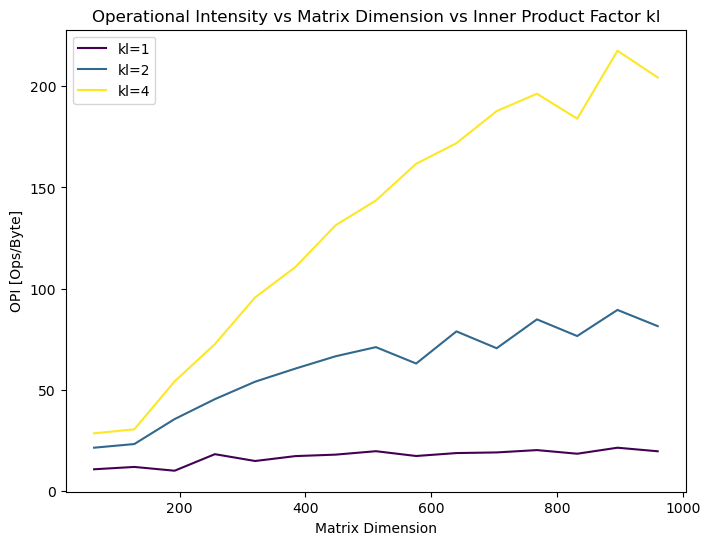

In [6]:
fig, axs = plt.subplots(figsize=(8,6))
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=kls.min(), vmax=kls.max())

dtype = np.array([8,16,32,64])
dims = np.array(range(64,1024, 64))
for dtype in dtypes:
    perf_model = fmodel.init_pm(vlB=np.array([512/8]),
                                mlB=np.array([512/8]),
                                kl=kls,
                                M=dims,
                                N=dims,
                                K=dims)


for kl in kls:
    blas_mem_bw = np.zeros(len(dims))
    blas_mem_opi = np.zeros(len(dims))
    opc = np.zeros(len(dims))
    for i, dim in enumerate(dims):
        blas_mem_opi[i] = perf_model.xs((dim, dim, dim, kl), level=['M', 'N', 'K','kl'])['blas_mem_opi'].values

    axs.plot(dims, blas_mem_opi, color=cmap(norm(kl)))

axs.legend([f'kl={kl}' for kl in kls])
axs.set_title('Operational Intensity vs Matrix Dimension vs Inner Product Factor kl')
axs.set_xlabel('Matrix Dimension')
axs.set_ylabel('OPI [Ops/Byte]')


t_uk  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu          
8        20    4  52 4  128      1  32.0 64.0 2         1    4     0.5        312.0   
                                    64.0 64.0 2         1    4     0.5        312.0   
                  60 4  128      1  32.0 64.0 2         1    4     0.5        312.0   
                                    64.0 64.0 2         1    4     0.5        312.0   
               12 52 4  128      1  16.0 64.0 2         1    4     0.5        312.0   
                  60 4  128      1  16.0 64.0 2         1    4     0.5        312.0   
               20 52 60 128      1  16.0 16.0 2         1    4     0.5        344.0   
                                         64.0 2         1    4     0.5        536.0   
                  60 4  128      1  16.0 64.0 2         1    4     0.5        312.0   
                     60 128      1  16.0 16.0 2         1    4     0.5        344.0   
               28 52 60 128      1  16.0 64.0 2         1    4     0.5        536.0   
                  60 60 128      1  16.0 64.0 2         1    4     0.5        536.0   
               36 52 60 128      1  16.0 16.0 4         1    4     0.5        344.0   
                                         32.0 2         1    4     0.5        408.0   
                                         64.0 2         1    4     0.5        536.0   
                                    32.0 64.0 2         1    4     0.5        536.0   
                                    64.0 64.0 2         1    4     0.5        536.0   
                  60 60 128      1  16.0 16.0 4         1    4     0.5        344.0   
                                         32.0 2         1    4     0.5        408.0   
                                         64.0 2         1    4     0.5        536.0   
                                    32.0 64.0 2         1    4     0.5        536.0   
                                    64.0 64.0 2         1    4     0.5        536.0   
               44 52 60 128      1  16.0 32.0 2         1    4     0.5        408.0   
                                         64.0 2         1    4     0.5        536.0   
                                    32.0 64.0 2         1    4     0.5        536.0   
                                    64.0 64.0 2         1    4     0.5        536.0   
                  60 60 128      1  16.0 32.0 2         1    4     0.5        408.0   
                                         64.0 2         1    4     0.5        536.0   
                                    32.0 64.0 2         1    4     0.5        536.0   
                                    64.0 64.0 2         1    4     0.5        536.0   
               52 52 60 128      1  16.0 16.0 4         1    4     0.5        344.0   
                                         32.0 2         1    4     0.5        408.0   
                                         64.0 2         1    4     0.5        536.0   
                                    32.0 64.0 2         1    4     0.5        536.0   
                                    64.0 64.0 2         1    4     0.5        536.0   
                  60 60 128      1  16.0 16.0 4         1    4     0.5        344.0   
                                         32.0 2         1    4     0.5        408.0   
                                         64.0 2         1    4     0.5        536.0   
                                    32.0 64.0 2         1    4     0.5        536.0   
                                    64.0 64.0 2         1    4     0.5        536.0   
               60 52 60 128      1  16.0 16.0 2         1    4     0.5        344.0   
                  60 60 128      1  16.0 16.0 2         1    4     0.5        344.0   
                                              4         1    4     0.5        344.0   
                                         32.0 2         1    4     0.5        408.0   
                                         64.0 2         1    4     0.5       

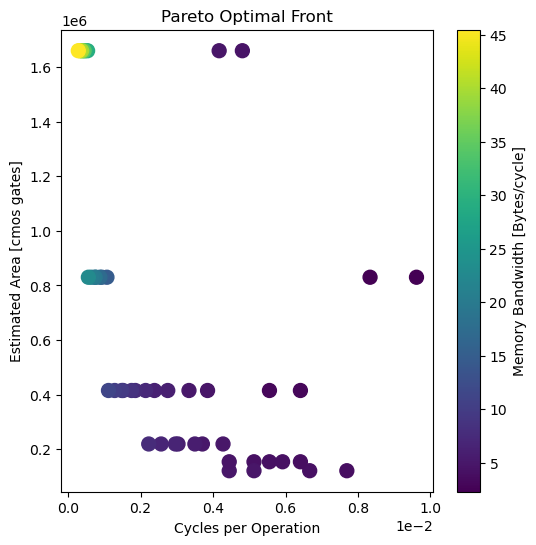

In [2]:
perf_model = fmodel.init_pm(
    mlB = np.array([128, 256, 512])/8,
    vlB = np.array([128, 256, 512])/8,
    N = np.array(range(4,64, 8)),
    M = np.array(range(4,64, 8)),
    K = np.array(range(4,64, 8)),
    num_mregs = np.array(range(2,6,2)),
    t_op = np.array([1, 2])
)
perf_model = perf_model[perf_model['blas_mem_bw'] <= 64]
perf_model = perf_model[perf_model['ops_cycle'] >= 1/1e-2]

pm_pareto = perf_model[['ops_cycle','opu_area', 'blas_mem_bw']]
mask = paretoset(pm_pareto, sense=['max', 'min', 'min'])

bw = perf_model.loc[mask,'blas_mem_bw']
ngates = perf_model.loc[mask,'opu_area']
opc = perf_model.loc[mask,'ops_cycle']

fig, axs = plt.subplots(1,figsize=(6,6))
axs.set_title('Pareto Optimal Front')
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('Estimated Area [cmos gates]')

scatter = axs.scatter(1/opc, ngates, c=bw, cmap='viridis', s=100)
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.colorbar(scatter, ax=axs, label='Memory Bandwidth [Bytes/cycle]')
perf_model[mask]

t_uk  \
databits t_mem M  N  K l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu          
8        20    4  28 4 128      1  64.0 16.0 2         1    4     0.5        120.0   
                                        64.0 2         1    4     0.5        312.0   
               52 4  4 128      1  64.0 32.0 2         1    4     0.5        184.0   

                                                                                 util  \
databits t_mem M  N  K l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu             
8        20    4  28 4 128      1  64.0 16.0 2         1    4     0.5        0.109375   
                                        64.0 2         1    4     0.5        0.027344   
               52 4  4 128      1  64.0 32.0 2         1    4     0.5        0.050781   

                                                                             ops_cycle  \
databits t_mem M  N  K l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu              
8        20    4  28 4 128      1  64.0 16.0 2         1    4     0.5            112.0   
                                        64.0 2         1    4     0.5            112.0   
               52 4  4 128      1  64.0 32.0 2         1    4     0.5            104.0   

                                                                             max_mregs  \
databits t_mem M  N  K l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu              
8        20    4  28 4 128      1  64.0 16.0 2         1    4     0.5              2.0   
                                        64.0 2         1    4     0.5              2.0   
               52 4  4 128      1  64.0 32.0 2         1    4     0.5              2.0   

                                                                             max_mrf_capacity  \
databits t_mem M  N  K l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu                     
8        20    4  28 4 128      1  64.0 16.0 2         1    4     0.5                     2.0   
                                        64.0 2         1    4     0.5                     2.0   
               52 4  4 128      1  64.0 32.0 2         1    4     0.5                    26.0   

                                                                             blas_mem_bw  \
databits t_mem M  N  K l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu                
8        20    4  28 4 128      1  64.0 16.0 2         1    4     0.5          14.400000   
                                        64.0 2         1    4     0.5           4.235294   
               52 4  4 128      1  64.0 32.0 2         1    4     0.5          47.000000   

                                                                             nmk_mem_bw  \
databits t_mem M  N  K l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu               
8        20    4  28 4 128      1  64.0 16.0 2         1    4     0.5               3.4   
                                        64.0 2         1    4     0.5               1.0   
               52 4  4 128      1  64.0 32.0 2         1    4     0.5               2.5   

                                                                                mrf_bw  \
databits t_mem M  N  K l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu              
8        20    4  28 4 128      1  64.0 16.0 2         1    4     0.5        16.800000   
                                        64.0 2         1    4     0.5         5.647059   
               52 4  4 128      1  64.0 32.0 2         1    4     0.5        95.111111   

                                                                             blas_mem_opi  \
databits t_mem M  N  K l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu                 
8        20    4  28 4 128      1  64.0 16.0 2         1    4     0.5            0.388889   
                                        64.0 2         1    4     0.5            0.388889   
               52 4  4 128      1  64.0 32.0 2         1    4     0.5    

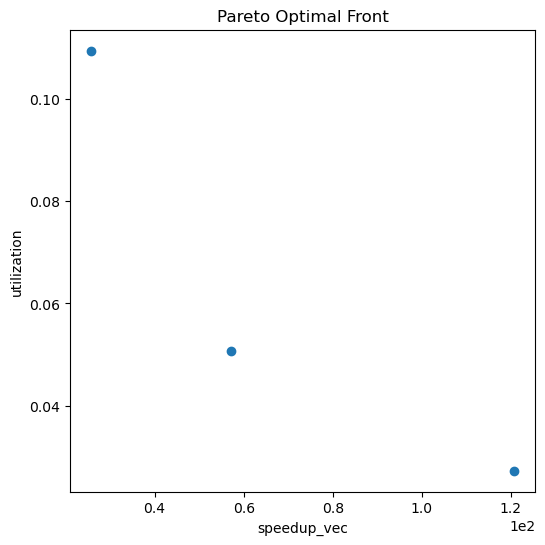

In [3]:
pm_pareto = perf_model[['speedup_vec','util']]
mask = paretoset(pm_pareto, sense=['min', 'min'])

speedup_vec = perf_model.loc[mask,'speedup_vec']
util = perf_model.loc[mask,'util']

fig, axs = plt.subplots(1,figsize=(6,6))
axs.set_title('Pareto Optimal Front')
axs.set_xlabel('speedup_vec')
axs.set_ylabel('utilization')

scatter = axs.scatter(speedup_vec, util)
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
perf_model[mask]

In [4]:

# mlB = np.array(range(128,513, 32))/8
mlB = np.array([128, 256, 512])/8
vlB = np.array([128, 256, 512])/8
num_mregs = np.array(range(2,6,2))
t_op = np.array([0, 1, 2])
width_mmu = np.array([0.5, 1])

def plot_nmk_scatter(x, y):
    fig, axs = plt.subplots(len(t_op), len(width_mmu), figsize=(18, 18))
    for m in range(len(t_op)):
        for n in range(len(width_mmu)):
                perf_model = fmodel.init_pm(t_op=np.array([t_op[m]]), width_mmu=np.array([width_mmu[n]]),                   
                                            N = np.array(range(4,64, 8)),
                                            M = np.array(range(4,64, 8)),
                                            K = np.array(range(4,64, 8)))

                # Create a 3x3 subplot
                ax = axs[m,n]
                ax.set_title(f'Speedup vs Utilization for MLEN={int(mlB[m]*8)} and VLEN={int(8*vlB[n])}')
                ax.set_xlabel('Speedup over Vector Unit')
                ax.set_ylabel('Utilization')
                perf_model['tile_size'] = perf_model.index.get_level_values('N') * perf_model.index.get_level_values('M')
                scatter = ax.scatter(perf_model['speedup_vec'], perf_model['util'],  
                                        c=perf_model['tile_size'], cmap='viridis')
                cbar = plt.colorbar(scatter, ax=ax)
    plt.show()